In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score


# Definições do trabalho:
### Indetificação de Câncer de mama como maligno ou benigno por Regressão Logística e Random Forest.
Atributos:
* texture_mean (média textura tumor)
* area_mean (média área tumor)
* concavity_mean (média concavidade do tumor)
* area_se (erro padrão da área do tumor)
* concavity_worst (maior valor médio de concavidade)

Exemplo:
	O tipo de câncer é maligno ou benigno.

---
Dados:

"Breast Cancer Wisconsin (Diagnostic) Data Set"

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

---

Lider:		André Guarnier De Mitri - andremitri@usp.br - (11) 977181087 \
Vice Lider:	Paloma Botto - palomabotto@usp.br - (92) 9316-4742

## Grupo:
André Guarnier De Mitri - 11395579 \
Fernanda Fanchin Schwarz - 12675486 \
Luís Antonio Arruda Soares - 12559486 \
Maria Victória Brandão Barros - 12608692 \
Paloma Botto - 12689641 \
Pedro Henrique Fidelis Prata Miranda - 12559510


# Carregando os dados

In [ ]:
url = 'https://drive.google.com/file/d/1_yVDFkwl0KxTl9zTHMw70IEfl2cqoIAb/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


# Tratamento inicial dos dados

## Removendo Valores Nulos

In [ ]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

Como podemos ver há uma única coluna com valores nulos, além disso, essa coluna possuí unicamente valores nulos, portanto podemos remove-la sem perda de informação.

In [ ]:
df = df.dropna(axis=1)

## Coluna Categórica
Adicionando uma nova coluna isMaligno para representar Câncer Maligno (Diagnostico "M") como 1, e Benigno (Diagnostico "B") como 0.

In [ ]:
# Trasnformando a string do diagnostico em uma variavel Binária
df["isMaligno"] = df["diagnosis"].isin(["M"]).astype(int)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,isMaligno
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


# Visualização Inicial

## Scatter plot

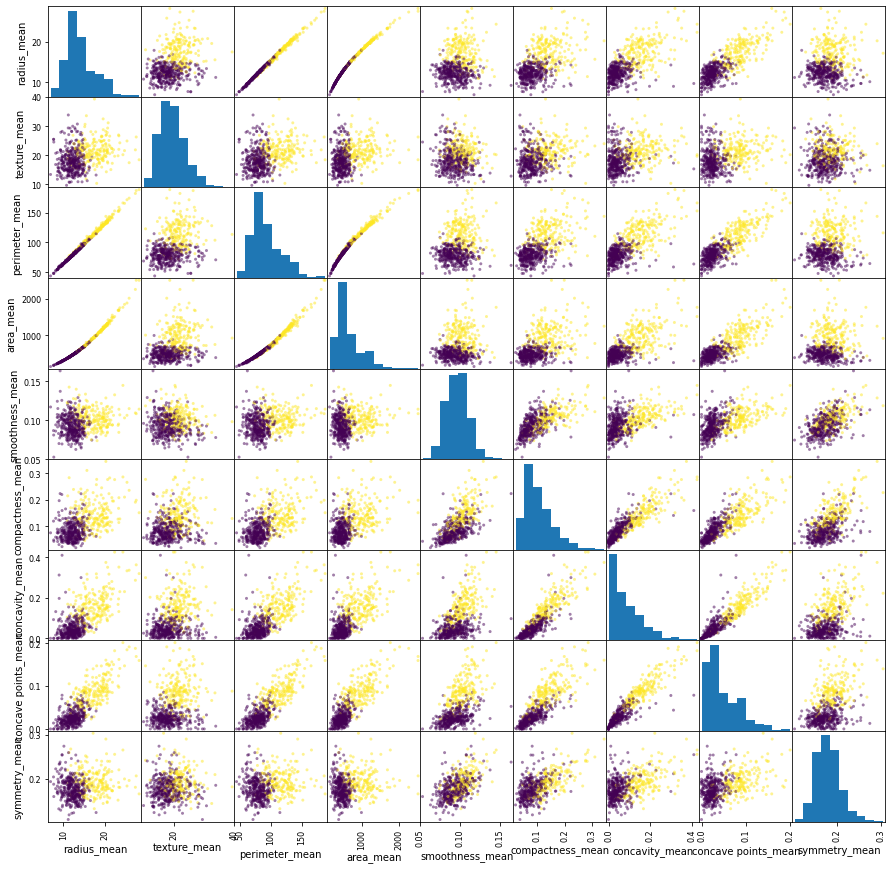

In [ ]:
features = list(df.columns[1:11])
color_function = {0: "blue", 1: "red"}
colors = df["isMaligno"]
pd.plotting.scatter_matrix(df[features], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

Podemos ver claramente os pares de variaveis com alta correlação:
perimeter_mean are_mean e radius_mean.

## Matrix de Correlação

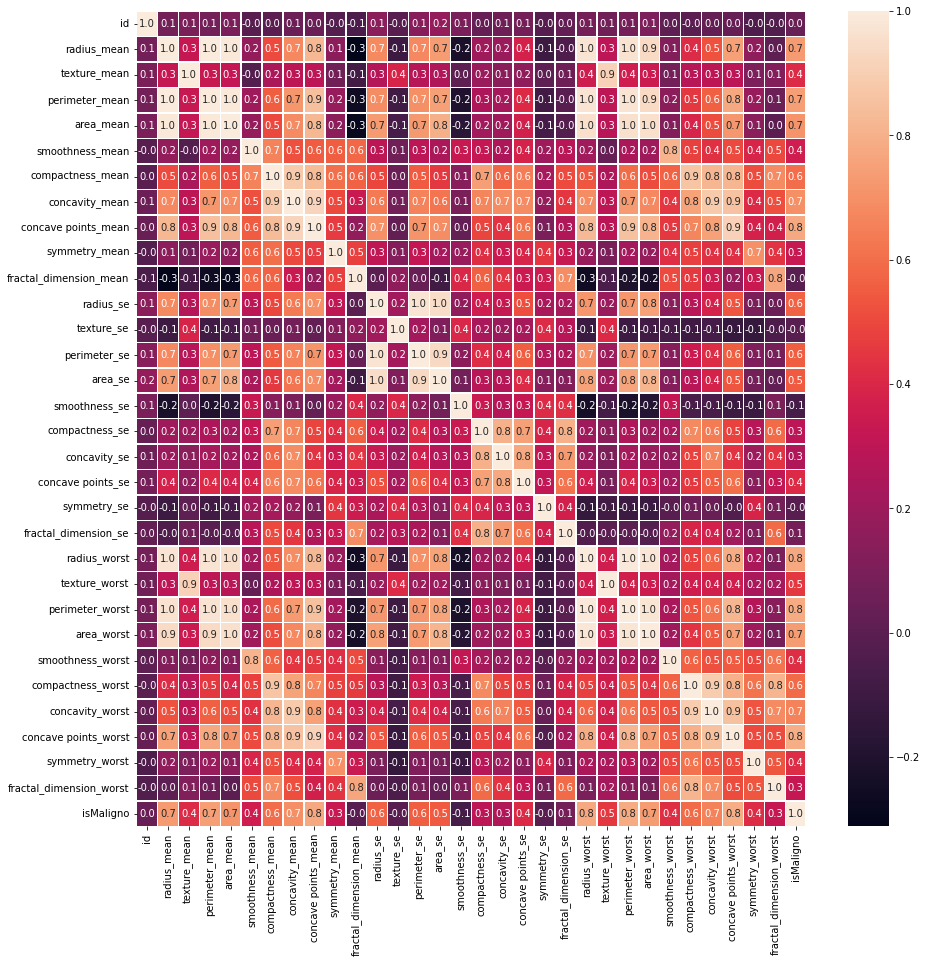

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True,linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Seleção de Features

- Como radius_mean, perimeter_mean e area_mean estão altamente correlacionados, utilizaremos apenas area_mean.

- Compactness_mean, concavity_mean e concave points_mean estão correlacionadas, usaremos concavity_mean.

- Radius_worst, perimeter_worst e area_worst estão correlacionadas então usaremos area_worst. 

- Compactness_worst, concavity_worst e concave points_worst estão correlacionadas então usaremos concavity_worst. 

- Compactness_se, concavity_se e concave points_se estão correlacionadas então usaremos concavity_se.
 
- Texture_mean e texture_worst estão correlacionadas usaremos texture_mean. 

- Area_worst and area_mean estão correlacionadas usaremos area_mean.

In [ ]:
df_numerico = df.select_dtypes(include=np.number).drop('id', axis=1)
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
df_numerico = df_numerico.drop(drop_list1, axis = 1)
df_numerico.head(3)

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,isMaligno
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890,1
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902,1
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758,1


## Visualização dos atributos selecionados

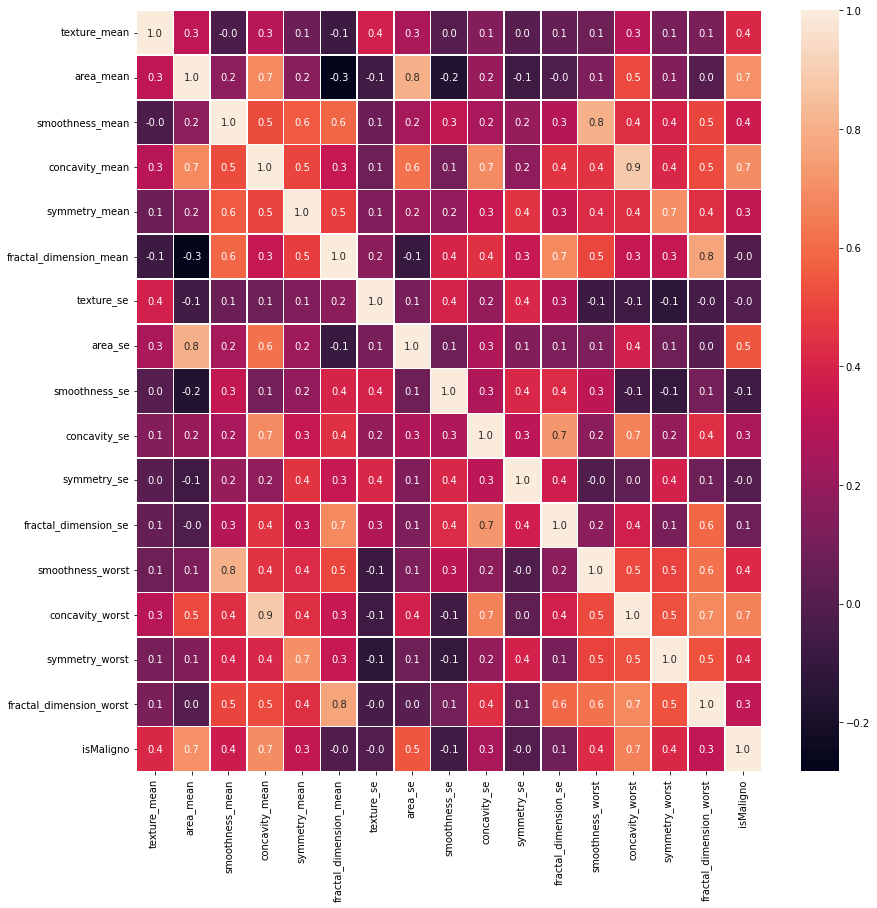

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_numerico.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Encontrando e listando as 5 melhores features com base no Qui Quadrado
X = df_numerico.drop('isMaligno', axis=1)
Y = df["isMaligno"]
select_feature = SelectKBest(chi2, k=5).fit(X, Y)
print('Scores das melhores features: \n', select_feature.scores_)
print("\n\n")
print('Lista das 5 melhores features: \n', select_feature.get_feature_names_out())

Scores das melhores features: 
 [9.38975081e+01 5.39916559e+04 1.49899264e-01 1.97123536e+01
 2.57379775e-01 7.43065536e-05 9.79353970e-03 8.75850471e+03
 3.26620664e-03 1.04471761e+00 8.03633831e-05 6.37136566e-03
 3.97365694e-01 3.95169151e+01 1.29886140e+00 2.31522407e-01]



Lista das 5 melhores features: 
 ['texture_mean' 'area_mean' 'concavity_mean' 'area_se' 'concavity_worst']


Podemos ver que "texture_mean", "area_mean", "concavity_mean", "area_se", "concavity_worst" são as 5 melhores features, portanto vamos utilizá-las nas próximas etapas.

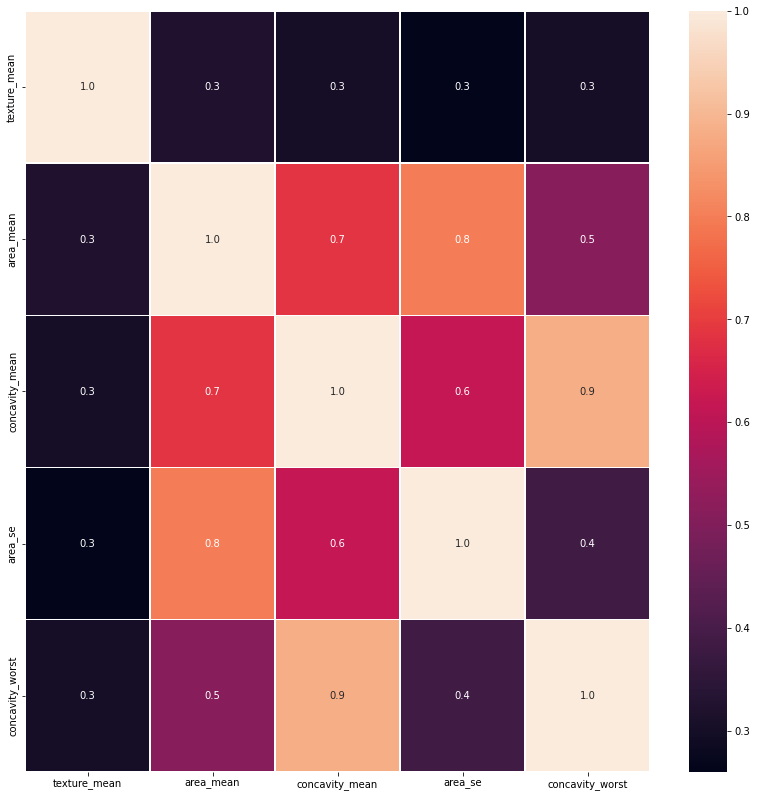

In [ ]:
features_escolhidas = df[["texture_mean", "area_mean", "concavity_mean", "area_se", "concavity_worst"]]
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(features_escolhidas.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Regressão Logística

In [ ]:
# Variaveis escolhidas
X = features_escolhidas
Y = df['isMaligno']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Treinando o modelo
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.343055
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              isMaligno   No. Observations:                  398
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.4812
Time:                        21:57:04   Log-Likelihood:                -136.54
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 1.282e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
texture_mean       -0.2814      0.031     -9.189      0.000      -0.341      -0.221
area_mean     

Test accuracy = 0.8713
Matrix de Confusão : 



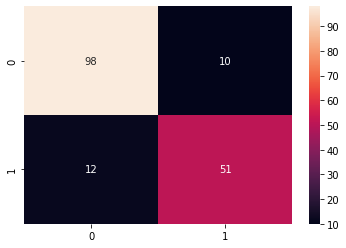

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
acc_regr = accuracy_score(y_test, prediction)
print(f'Test accuracy = {acc_regr:.4f}')
print("Matrix de Confusão : \n")
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
f1 = f1_score(y_test, prediction)
print(f"F1 score = {f1}")

F1 score = 0.8225806451612904


Podemos ver que algumas das variáveis escolhidas, como area_mean e concavity_mean não são relevantes para regressão para um teste de hipóteses no intervalo de 5%, vamos tentar outra regressão sem elas.

### Removendo parâmetros que não passaram no teste de hipótese

In [ ]:
# Variaveis escolhidas
X = features_escolhidas[["texture_mean", "area_se", "concavity_worst"]]
Y = df['isMaligno']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Treinando o modelo
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.343384
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              isMaligno   No. Observations:                  398
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.4807
Time:                        21:57:05   Log-Likelihood:                -136.67
converged:                       True   LL-Null:                       -263.17
Covariance Type:            nonrobust   LLR p-value:                 1.145e-55
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
texture_mean       -0.2777      0.027    -10.260      0.000      -0.331      -0.225
area_se       

Test accuracy = 0.8772
Matrix de Confusão: 



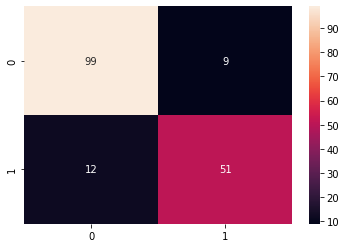

In [ ]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
acc_regr = accuracy_score(y_test, prediction)
print(f'Test accuracy = {acc_regr:.4f}')
print("Matrix de Confusão: \n")
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Houve uma leve melhora, mas ela não é muito significativa.

In [ ]:
f1 = f1_score(y_test, prediction)
print(f"F1 score = {f1}")

F1 score = 0.8292682926829269


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Data Split

In [ ]:
X_RF = features_escolhidas
Y_RF = df['isMaligno']

# Dividindo o dataset em treino e predição
x_RF_train, x_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, Y_RF, test_size=0.3, random_state=42)

### Treinando o algoritimo

In [ ]:
# Treino:
treino = RandomForestClassifier(random_state=42)
treino = treino.fit(x_RF_train, y_RF_train)

###Predição e métricas

Test accuracy = 0.9532
Matrix de Confusão : 



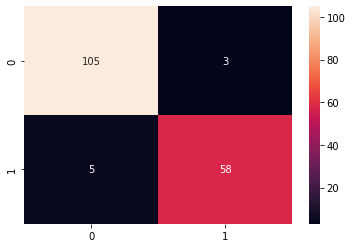

In [ ]:
# Predição
pred = treino.predict(x_RF_test)

# Acurácia
cm = confusion_matrix(y_RF_test, treino.predict(x_RF_test))
acc_rf = accuracy_score(y_RF_test, pred)
print(f'Test accuracy = {acc_rf:.4f}')
print("Matrix de Confusão : \n")
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
f1 = f1_score(y_RF_test, pred)
print(f"F1 score = {f1}")

F1 score = 0.9354838709677418


## E se utilizassemos todas as features  ao invés das 5 melhores?

Accuracy:  1.0
Matrix Confussão:


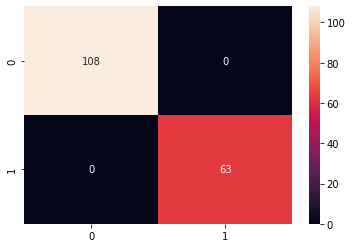

In [ ]:
# Data Split
X_RF = df_numerico
Y_RF = df['isMaligno']
x_train, x_test, y_train, y_test = train_test_split(X_RF, Y_RF, test_size=0.3, random_state=42)

# Treino
clf_rf = RandomForestClassifier(random_state=42)
clr_rf = clf_rf.fit(x_train,y_train)
pred = clf_rf.predict(x_test)

# Resultados
cm = confusion_matrix(y_test, clf_rf.predict(x_test))
print('Accuracy: ', accuracy_score(y_test, clf_rf.predict(x_test)))
print('Matrix Confussão:')
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
f1 = f1_score(y_RF_test, pred)
print(f"F1 score = {f1}")

F1 score = 1.0


# Resultados Obtidos

## Regressão Logística
A acurácia da regressão logística, utilizando as 5 melhores features foi de 87,13%, porém percebemos que nem todos os parâmetros estimados eram uteis para essa regressão, e ao removermos duas features que não passaram no teste de hipótese, aumentamos a acurácia para 87,72%.

## Random Forest
Obtivemos um uma acurácia de 100% quando utlizamos todas as features, em contraste com 95.34% de acurácia para as 5 features mais relevantes. Por conseguinte, a matrix de confusão para a melhor acurácia mostrou que erros não foram cometidos, enquanto no outro caso houve 8 classificações erradas.